In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

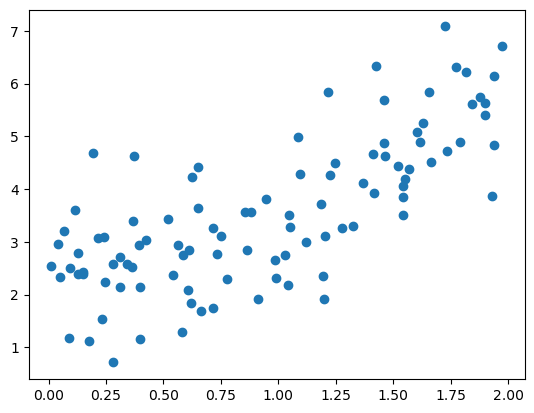

In [3]:
plt.scatter(X, y)
m=X.shape[0]

In [4]:
def cost(y_hat, y):
    err = ((y_hat - y)**3)
    cost = err.mean()
    return cost

In [5]:
y.shape

(100, 1)

In [6]:
def hypothesis(x,w,b):
    return w*x+b

In [7]:
def gradient_descent(x,y,w,b,learning_rate,m):
   y_hat=hypothesis(x,w,b)
   dw = (3.0/m)*np.sum(((x)*((y_hat-y)**2)*(y_hat-y)))
   db = (3.0/m)*np.sum(((y_hat-y)**2)*(y_hat-y))
   w = w -learning_rate*dw
   b = b - learning_rate*db
   return w,b

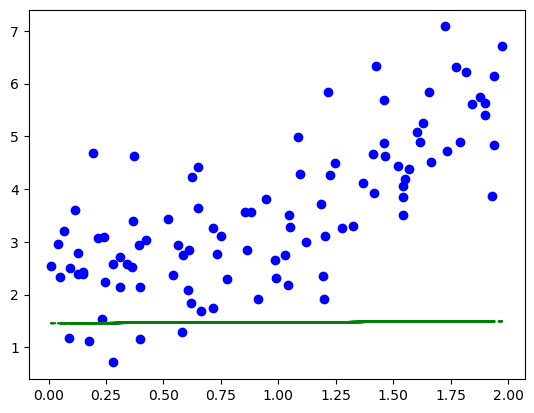

[0.01809559] [1.45687521]


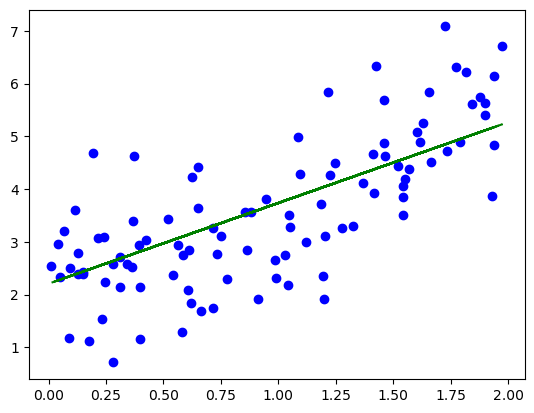

[1.52961502] [2.20758937]


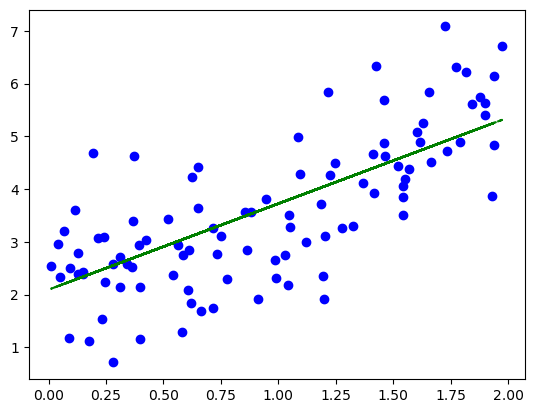

[1.63014492] [2.0943816]


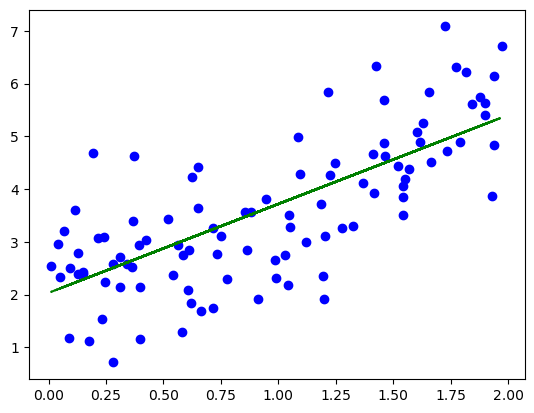

[1.68422231] [2.0339783]


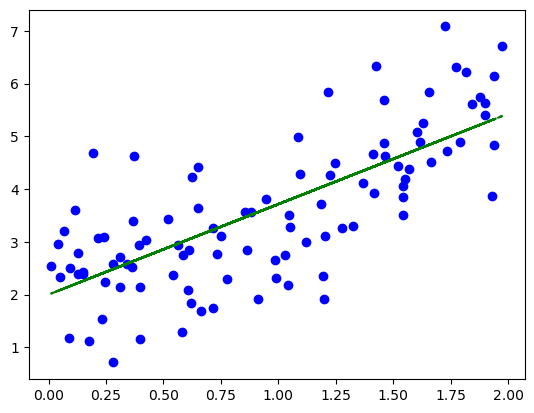

[1.71319364] [2.00180617]


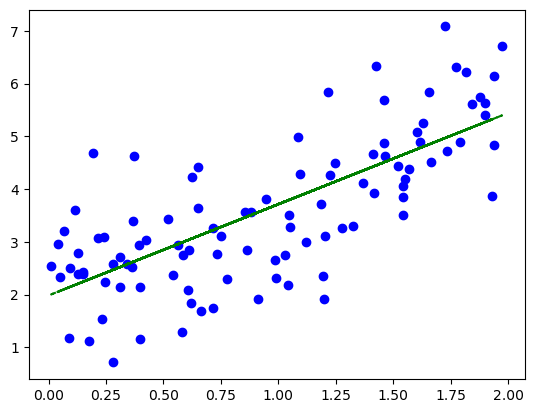

[1.72864839] [1.98470015]


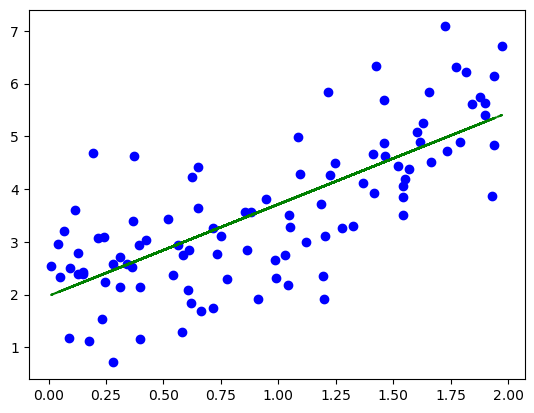

[1.73687021] [1.97561615]


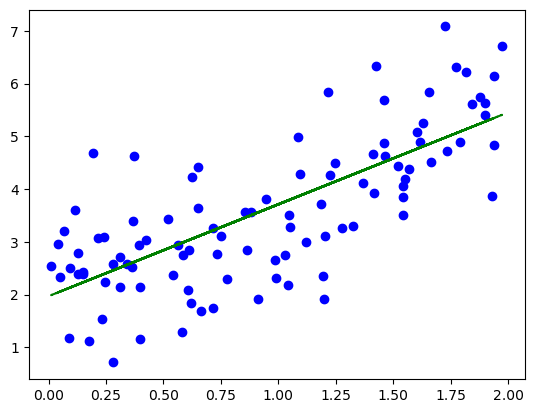

[1.74123724] [1.9707958]


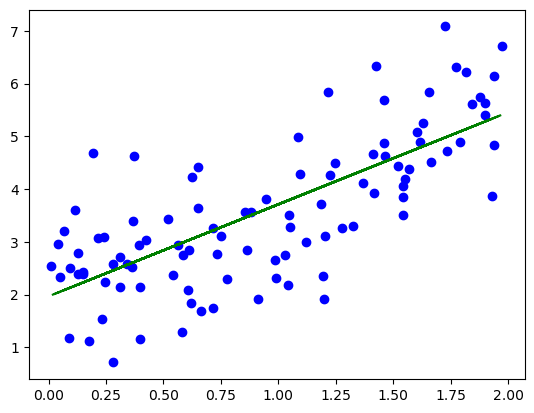

[1.74355478] [1.96823902]


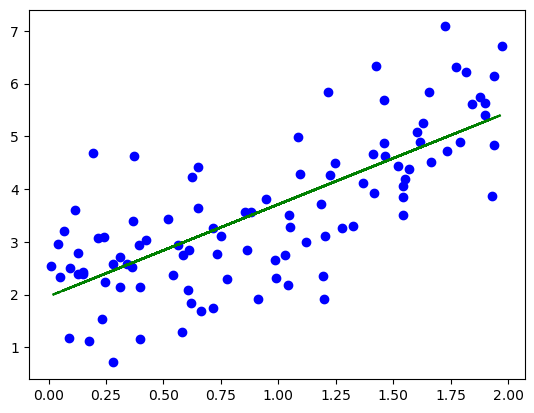

[1.74478408] [1.96688318]


In [8]:
# Random Initialisation
w = np.random.randn(1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.00005
num_epochs = 100000

L=[]
for i in range(num_epochs):
    w, b = gradient_descent(X,y,w,b,learning_rate,m)
    y_hat = hypothesis(X,w,b)
    L.append(cost(y_hat,y))
    if (i%(num_epochs/10))==0:
        plt.plot(X,y,'bo')
        plt.plot(X,y_hat,'g--')
        plt.show()
        print(w,b)


Obtained value of w: [1.74543594]
Obtained value of b: [1.96616433]
Obtained line: y=[1.74543594]x+[1.96616433]


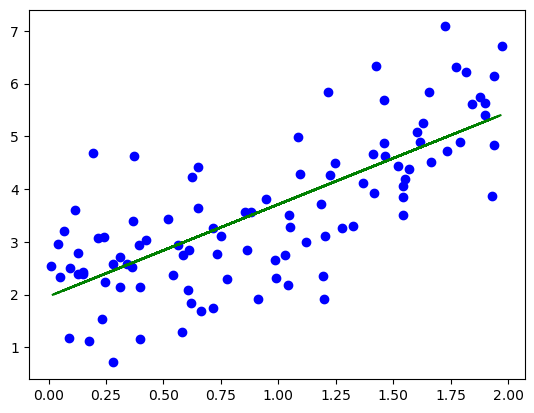

In [9]:
print(f"Obtained value of w: {w}")
print(f"Obtained value of b: {b}")
print(f"Obtained line: y={w}x+{b}")
plt.plot(X,y,'bo')
plt.plot(X,y_hat,'g--')
plt.show()

Poly regression

In [10]:
# Polynomial regression using NumPy with loss |x - xhat|^7
def polynomial_regression_custom_loss(X, y, degree, learning_rate=0.000001, n_iterations=10000):
    m = len(X)
    theta = np.random.randn(degree, 1)

    for iteration in range(n_iterations):
        X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
        error = X_poly.dot(theta) - y
        loss = np.mean(np.abs(error)**7)  
        gradient = 7 * X_poly.T @ (np.sign(error) * np.abs(error)**6) / m

        theta = theta - learning_rate * gradient

    return theta

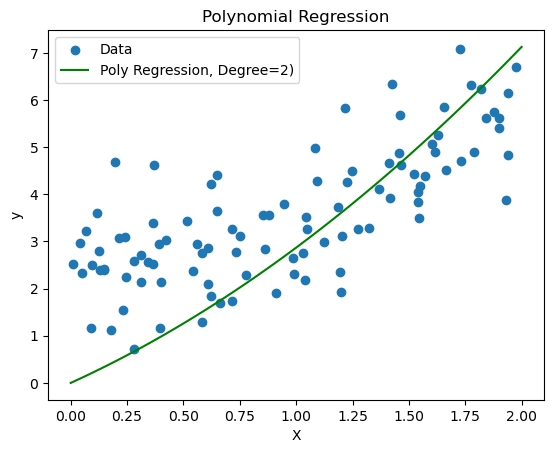

In [11]:
degree = 2
theta_poly_custom_loss = polynomial_regression_custom_loss(X, y, degree)

X_vis = np.linspace(0, 2, 100).reshape(-1, 1)
X_poly_vis = np.column_stack([X_vis**i for i in range(1, degree + 1)])
y_poly_pred_custom_loss = X_poly_vis.dot(theta_poly_custom_loss)

plt.scatter(X, y, label='Data')
plt.plot(X_vis, y_poly_pred_custom_loss, color='green', label=f'Poly Regression, Degree={degree})')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

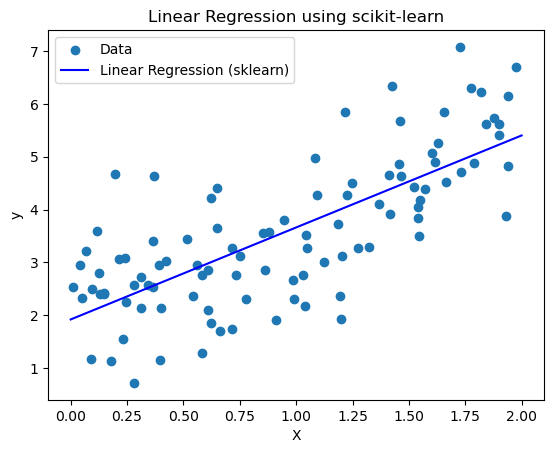

In [12]:
from sklearn.linear_model import LinearRegression

if X.ndim == 1:
    X = X.reshape(-1, 1)

# Train a linear regression model using scikit-learn
linear_reg = LinearRegression()
linear_reg.fit(X, y)

X_vis = np.linspace(0, 2, 100).reshape(-1, 1)
y_linear_pred = linear_reg.predict(X_vis)

plt.scatter(X, y, label='Data')
plt.plot(X_vis, y_linear_pred, color='blue', label='Linear Regression (sklearn)')
plt.title('Linear Regression using scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


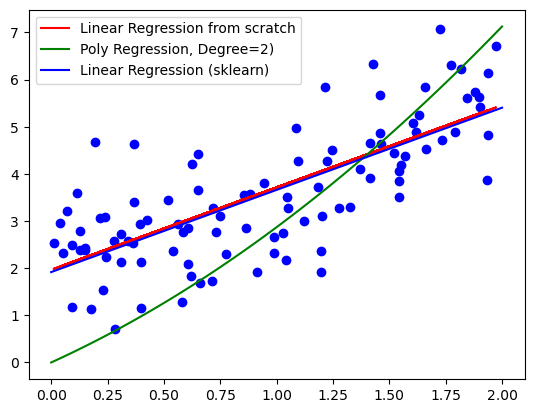

In [16]:
plt.plot(X,y,'bo')
plt.plot(X,y_hat,'r', label='Linear Regression from scratch')
plt.plot(X_vis, y_poly_pred_custom_loss, color='green', label=f'Poly Regression, Degree={degree})')
plt.plot(X_vis, y_linear_pred, color='blue', label='Linear Regression (sklearn)')
plt.legend()